In [5]:
import pandas as pd


In [6]:
print(pd.__version__)

2.2.3


In [7]:
df =pd.read_csv(r"C:\Projects\DSproject\Data\Air_Quality_dataset_of_kathmandu.csv")

In [8]:
df

,Datetime,PM10 (μg/m³),PM2.5 (μg/m³),CO (μg/m³),NO2 (μg/m³),SO2 (μg/m³),Temp (°C),Humidity (%),Wind_Speed (km/h),Soil_Moisture (m³/m³),AQI
0,2022-08-05 00:00:00,31.7,22.2,478.0,14.1,5.2,20.300000,98.000000,3.100000,0.426000,58
1,2022-08-05 01:00:00,29.7,20.8,435.0,11.6,4.5,21.000000,96.000000,1.800000,0.425000,59
2,2022-08-05 02:00:00,25.3,17.7,374.0,8.2,3.5,21.700000,93.000000,3.100000,0.424000,59
3,2022-08-05 03:00:00,23.1,16.2,303.0,4.3,2.5,23.200000,86.000000,3.100000,0.423000,60
4,2022-08-05 04:00:00,20.3,14.2,272.0,2.9,2.0,25.100000,76.000000,2.100000,0.421000,60
...,...,...,...,...,...,...,...,...,...,...,...
22531,2025-02-28 19:00:00,49.1,29.6,780.0,13.4,7.8,17.919721,74.457112,4.023171,0.293815,153
22532,2025-02-28 20:00:00,46.4,28.2,652.0,11.1,7.5,17.919721,74.457112,4.023171,0.293815,151
22533,2025-02-28 21:00:00,44.2,27.1,548.0,9.6,7.2,17.919721,74.457112,4.023171,0.293815,146
22534,2025-02-28 22:00:00,42.4,26.0,489.0,9.1,6.9,17.919721,74.457112,4.023171,0.293815,137


In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")



MAE: 9.085022182786158
MSE: 165.5372212954747
r2_score: 0.8794696627006696


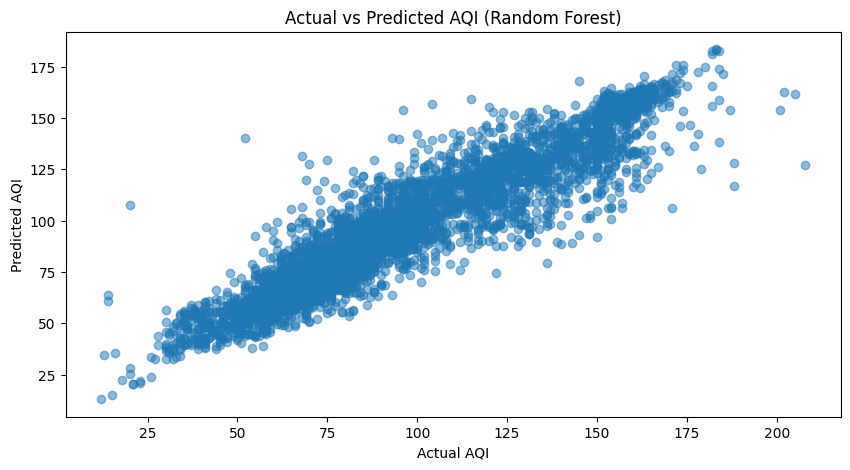

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = df.drop(columns=["AQI", "Datetime"])
target = df["AQI"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Evaluate model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Random Forest)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
# List of models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
   
]
# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - \n MAE: {mean_absolute_error(y_test, y_pred)},\n MSE: {mean_squared_error(y_test, y_pred)},\n r2_score: {r2_score(y_test, y_pred)}")



RandomForestRegressor - 
 MAE: 9.098999556344276,
 MSE: 165.00705210736467,
 r2_score: 0.879855687490554
GradientBoostingRegressor - 
 MAE: 11.878412882591414,
 MSE: 252.8618508144415,
 r2_score: 0.8158871827720431
AdaBoostRegressor - 
 MAE: 18.33651898229924,
 MSE: 485.0503095638278,
 r2_score: 0.6468269978114525
BaggingRegressor - 
 MAE: 9.480479148181011,
 MSE: 184.52283496007098,
 r2_score: 0.8656459292773329
ExtraTreesRegressor - 
 MAE: 8.682129547471162,
 MSE: 152.44277937000888,
 r2_score: 0.8890039383739683


In [16]:
import pickle 

# Save the model
with open(r"C:\Projects\DSproject\model.pkl", "wb") as file:
    pickle.dump(rf, file)


